## Analisis cantidad por centro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fracuencias = []
with open("cant_centros_reducido.txt") as frecuencia_centros:
    frecuencias = []
    for linea in frecuencia_centros:
        cantidad = linea.split(",")[1]
        frecuencias.append(cantidad)

plt.bar(np.arange(30), np.array(frecuencias))
plt.show()


<Figure size 640x480 with 1 Axes>

## Gráfico que representa la asignación

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
centro_por_votante = pd.read_csv("bivalente_encendidas_reducido_heuristica.csv")

In [4]:
centro_por_votante.head()

,id_votante,id_centro
0,1,20
1,27,20
2,36,20
3,42,20
4,43,20


In [5]:
ubicaciones_votantes = pd.read_csv("votantes_reducido.csv")

In [6]:
ubicaciones_votantes.head()

,id_votante,latitud,longitud
0,1,-34.587721,-58.407334
1,2,-34.590931,-58.401436
2,3,-34.588754,-58.401254
3,4,-34.593804,-58.399609
4,5,-34.574731,-58.390246


In [7]:
ubicaciones_centros = pd.read_csv("centros_reducido.csv")

In [8]:
ubicaciones_centros.head()

,id_centro,lat,long,max_votantes
0,1,-34.584847,-58.400357,83
1,2,-34.598406,-58.390597,111
2,3,-34.590186,-58.392239,226
3,4,-34.595953,-58.388593,110
4,5,-34.590054,-58.403396,190


In [9]:
votantes = ubicaciones_votantes.set_index('id_votante').join(centro_por_votante.set_index('id_votante'),how='inner').reset_index()
votantes.head()

,id_votante,latitud,longitud,id_centro
0,1,-34.587721,-58.407334,20
1,2,-34.590931,-58.401436,14
2,3,-34.588754,-58.401254,14
3,4,-34.593804,-58.399609,15
4,5,-34.574731,-58.390246,1


In [10]:
#ubicaciones_centros['centro'] = True
#votantes['centro'] = False

In [11]:
ubicaciones_centros.head()

,id_centro,lat,long,max_votantes
0,1,-34.584847,-58.400357,83
1,2,-34.598406,-58.390597,111
2,3,-34.590186,-58.392239,226
3,4,-34.595953,-58.388593,110
4,5,-34.590054,-58.403396,190


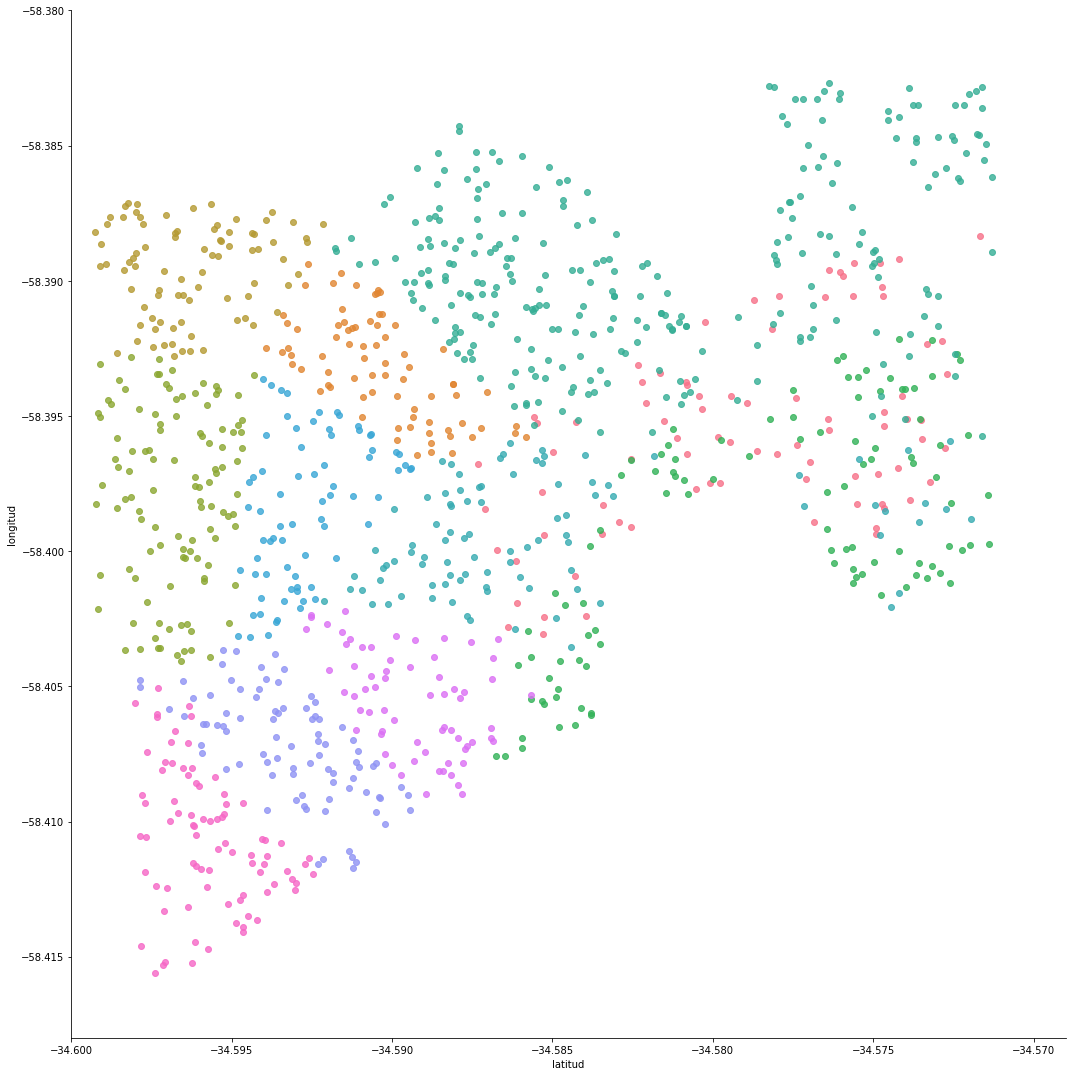

In [12]:
g = sns.lmplot( x="latitud", y="longitud", data=votantes, fit_reg=False, hue='id_centro', legend=False, height=15)

g.set(ylim=(-58.418,-58.38), xlim=(-34.60, -34.569))
plt.show()

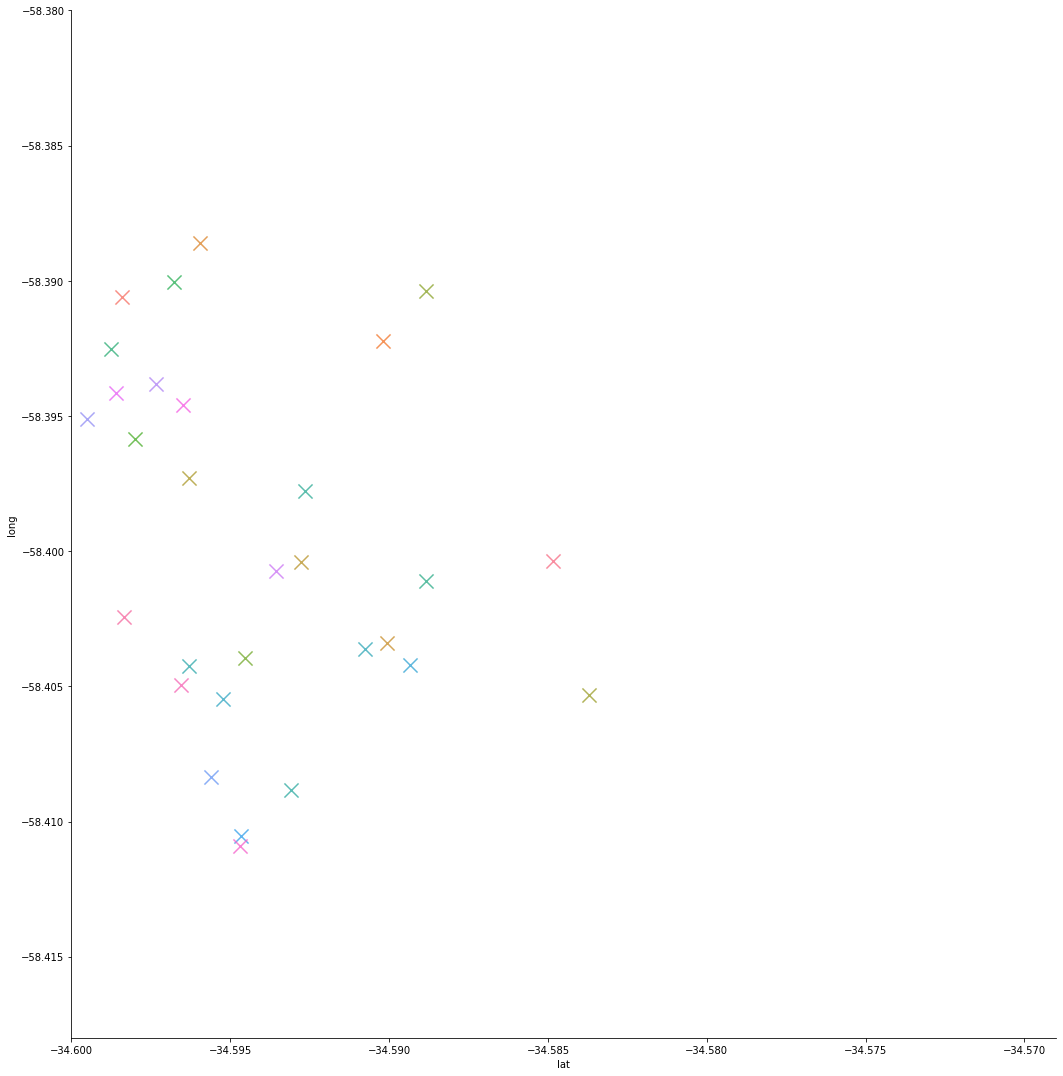

In [13]:
g = sns.lmplot( x="lat", y="long", data=ubicaciones_centros, fit_reg=False, hue='id_centro',markers='x', legend=False, height=15, scatter_kws={"s": 200})

g.set(ylim=(-58.418,-58.38), xlim=(-34.60, -34.569))


plt.show()

In [14]:
#length_fig, length_ax = plt.subplots()
#sns.barplot(x='sepal_length', y='species', data=iris, ax=length_ax)
#length_fig.savefig('ex1.pdf')

#width_fig, width_ax = plt.subplots()
#sns.barplot(x='sepal_width', y='species', data=iris, ax=width_ax)
#width_fig.savefig('ex2.pdf')

## Diferencia entre max y min por centro

In [15]:
distancias_totales = pd.read_csv("constantes_reducido.csv")

In [16]:
distancias_totales.head()

,id_votante,id_centro,distancia
0,1,1,0.715146
1,1,2,1.939783
2,1,3,1.411655
3,1,4,1.946799
4,1,5,0.444479


In [17]:
centro_por_votante.head()

,id_votante,id_centro
0,1,20
1,27,20
2,36,20
3,42,20
4,43,20


In [18]:
distancias_totales = distancias_totales.set_index(['id_votante', 'id_centro'])
distancias_totales.head()

distancia
id_votante id_centro           
1          1           0.715146
           2           1.939783
           3           1.411655
           4           1.946799
           5           0.444479

In [19]:
centro_por_votante = centro_por_votante.set_index(['id_votante', 'id_centro'])
centro_por_votante.head()

,
id_votante,id_centro
1,20
27,20
36,20
42,20
43,20


In [20]:
distancias = distancias_totales.join(centro_por_votante,how='right').reset_index()
distancias.head()

,id_votante,id_centro,distancia
0,1,20,0.337873
1,27,20,0.394517
2,36,20,0.097919
3,42,20,0.308335
4,43,20,0.344287


In [21]:
max_centros = distancias.groupby('id_centro')['distancia'].max()
max_centros = max_centros.to_frame()
max_centros.rename(columns={'distancia':'distancia_max(km)'}, inplace=True)
max_centros

,distancia_max(km)
id_centro,
1,1.829627
3,0.581298
4,0.474179
7,0.624709
8,1.706417
9,2.032744
14,1.887394
15,0.545655
16,0.645594


In [22]:
min_centros = distancias.groupby('id_centro')['distancia'].min()
min_centros = min_centros.to_frame()
min_centros.rename(columns={'distancia':'distancia_min(km)'}, inplace=True)
min_centros

,distancia_min(km)
id_centro,
1,0.079221
3,0.015190
4,0.024384
7,0.018340
8,0.061713
9,0.019594
14,0.016623
15,0.061535
16,0.036128


In [23]:
diferencia_distancias = min_centros.join(max_centros)
diferencia_distancias

,distancia_min(km),distancia_max(km)
id_centro,,
1,0.079221,1.829627
3,0.015190,0.581298
4,0.024384,0.474179
7,0.018340,0.624709
8,0.061713,1.706417
9,0.019594,2.032744
14,0.016623,1.887394
15,0.061535,0.545655
16,0.036128,0.645594


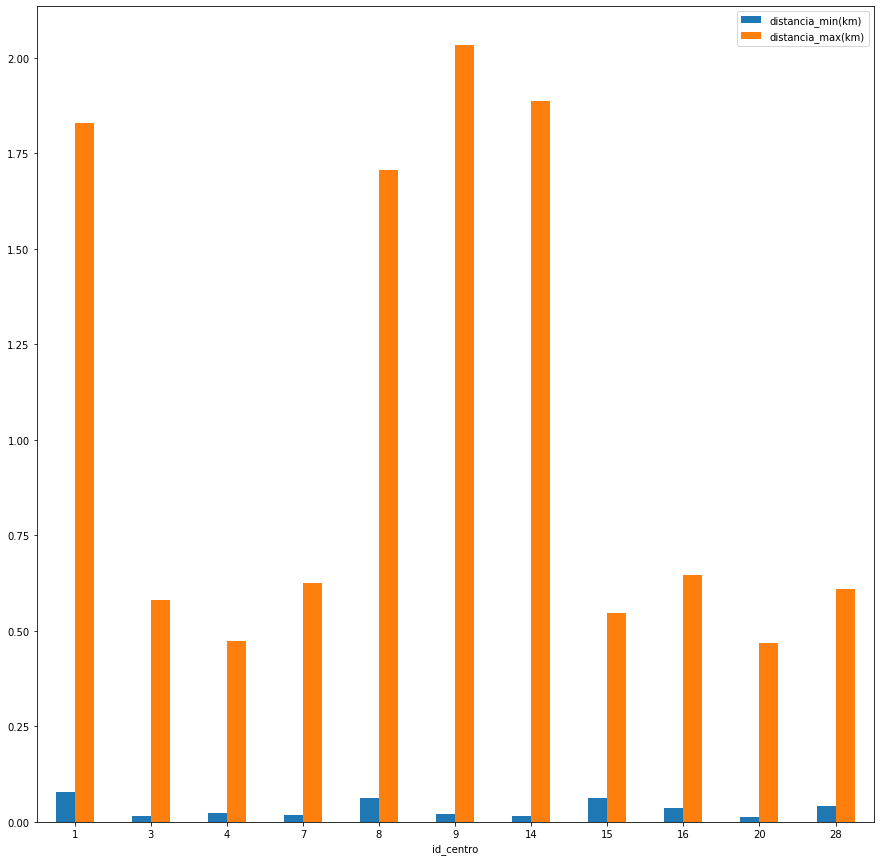

In [24]:
ax = diferencia_distancias.plot.bar(rot=0, figsize=(15,15))

plt.show()


In [25]:
distancias_totales = distancias_totales.reset_index()

distancias_totales.head()

,id_votante,id_centro,distancia
0,1,1,0.715146
1,1,2,1.939783
2,1,3,1.411655
3,1,4,1.946799
4,1,5,0.444479


In [26]:
def get_info(centro):
    distancias_aux = distancias[distancias['id_centro'] == centro]
    distancias_aux = distancias_aux.loc[distancias_aux['distancia'].idxmax()]
    votante = int(distancias_aux['id_votante'])
    distancia = float(distancias_aux['distancia'])
    return votante, distancia

def comparar_distancias_a_vot(centro):
    votante, distancia = get_info(centro)
    length_fig, length_ax = plt.subplots()
    ditancias_vot = distancias_totales[distancias_totales["id_votante"]==votante].set_index('id_centro')['distancia']
    ditancias_vot = ditancias_vot.to_frame()
    ax1 = ditancias_vot.plot.bar(rot=0, figsize=(15,15), ax=length_ax)
    ax2 = plt.plot(np.array([i for i in range(0,30)]), np.array([distancia for _ in range(30)]), color='green')
    plt.show()

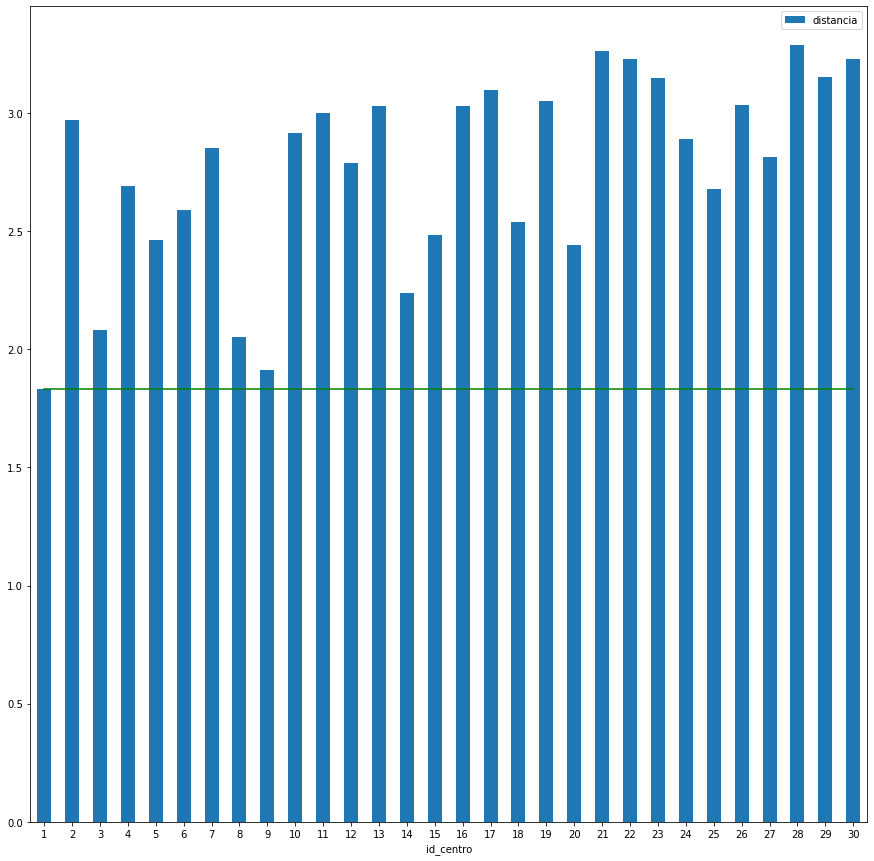

In [27]:
comparar_distancias_a_vot(1)

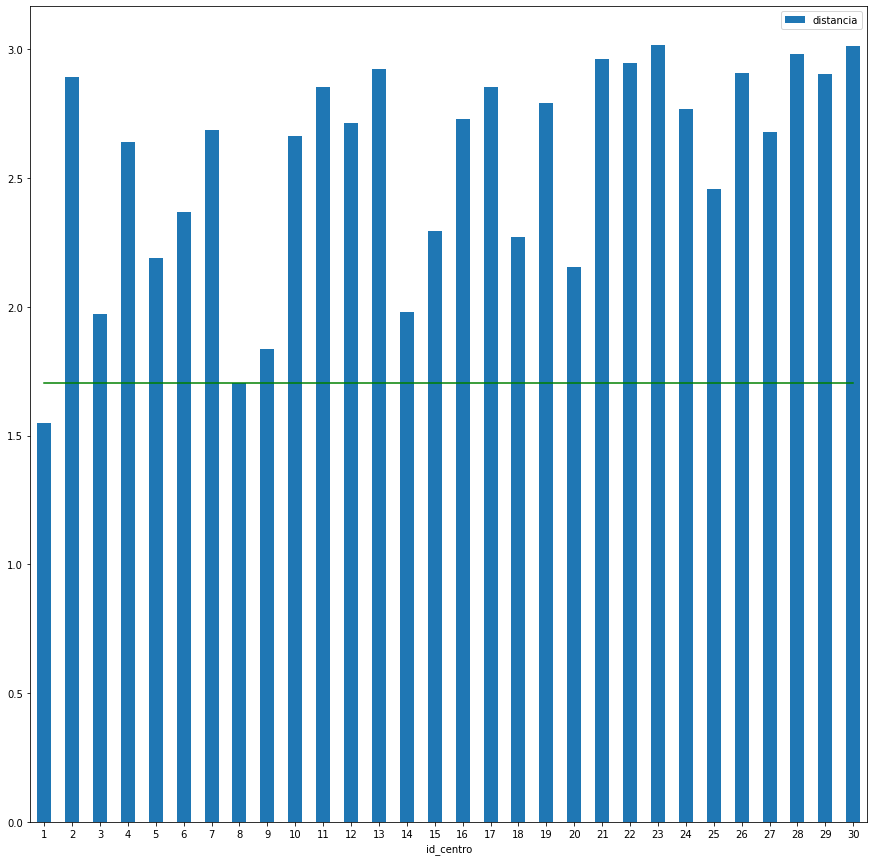

In [28]:
comparar_distancias_a_vot(8)

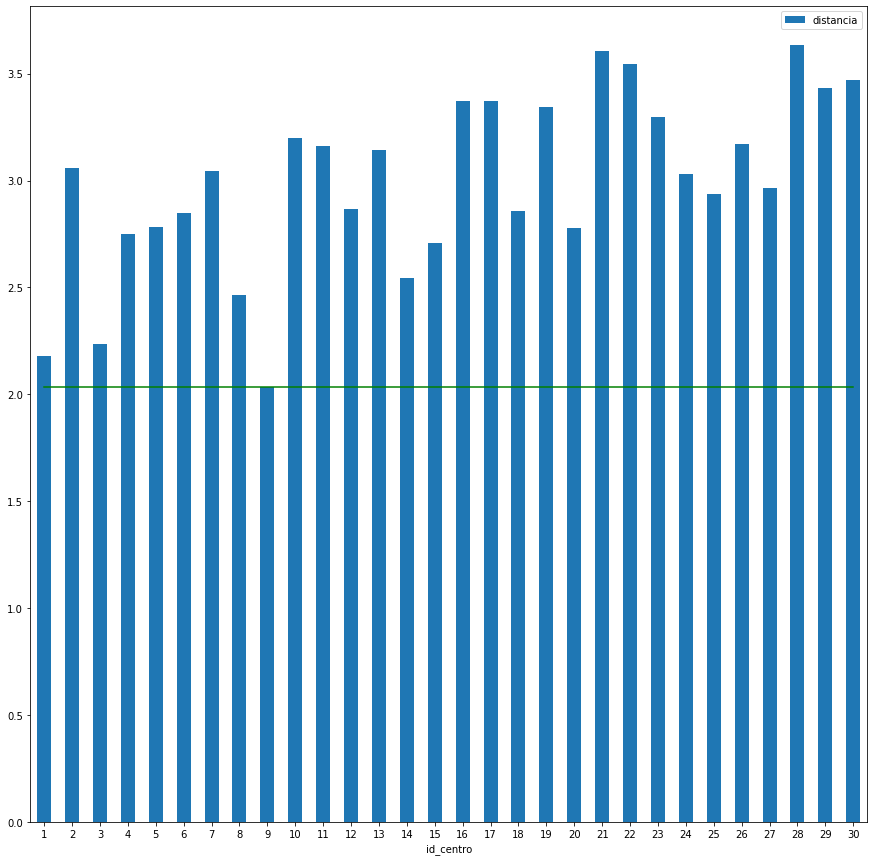

In [29]:
comparar_distancias_a_vot(9)

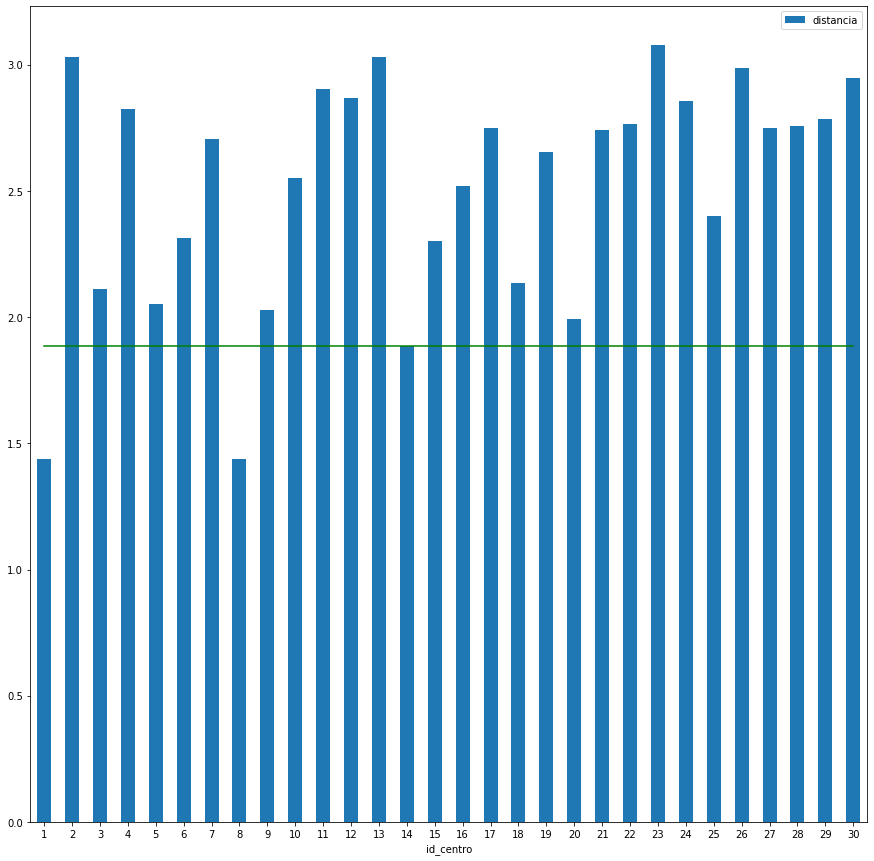

In [30]:
comparar_distancias_a_vot(14)

2.0327439999999997
0.537091229276896
0.013803


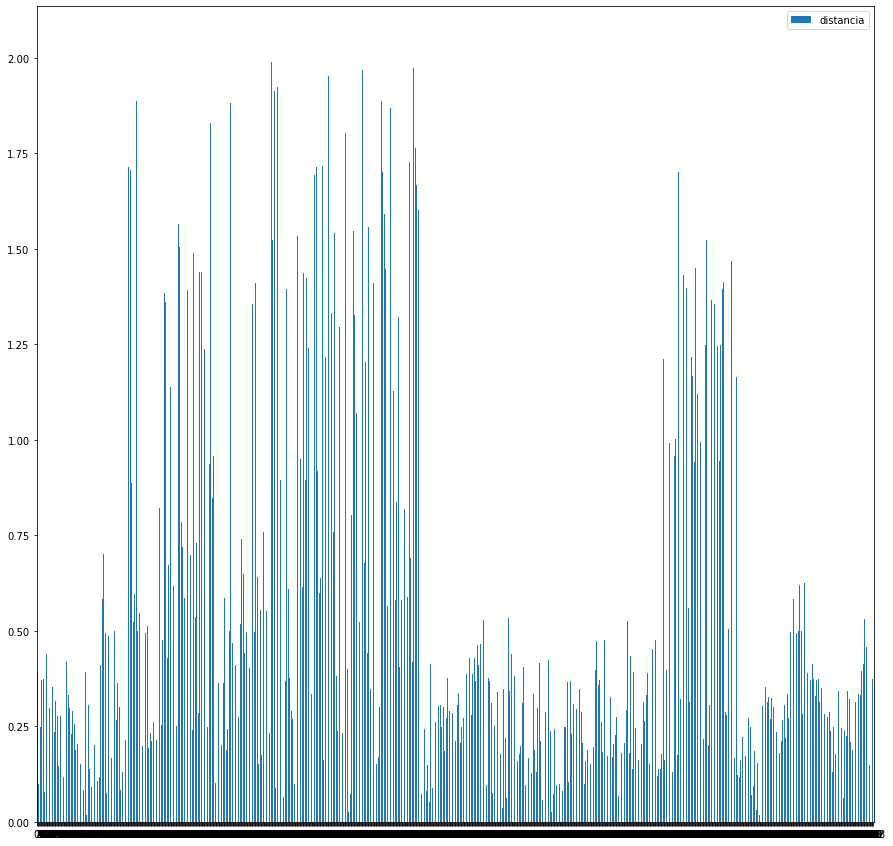

In [31]:
distancia_max = distancias['distancia'].max()
distancia_promedio = distancias['distancia'].mean()
distancia_min = distancias['distancia'].min()
print(distancia_max)
print(distancia_promedio)
print(distancia_min)
distancias_aux = distancias['distancia'].to_frame()
distancias_aux.plot.bar(rot=0, figsize=(15,15))
plt.show()

## Cantidad de votantes por centro

In [32]:
distancias.head()

,id_votante,id_centro,distancia
0,1,20,0.337873
1,27,20,0.394517
2,36,20,0.097919
3,42,20,0.308335
4,43,20,0.344287


In [33]:
cantidad_por_centro = distancias.groupby('id_centro').count()
cantidad_por_centro = cantidad_por_centro.rename(columns={'id_votante':'cantidad_votantes'})
cantidad_por_centro = cantidad_por_centro['cantidad_votantes'].to_frame()

max_por_centro = ubicaciones_centros.set_index('id_centro')['max_votantes'].to_frame()
cantidad_vs_max_por_centro = cantidad_por_centro.join(max_por_centro, how='left')
cantidad_vs_max_por_centro['min_votantes'] = [30 for _ in range(cantidad_vs_max_por_centro['max_votantes'].size)]
cantidad_vs_max_por_centro

,cantidad_votantes,max_votantes,min_votantes
id_centro,,,
1,83,83,30
3,76,226,30
4,83,110,30
7,111,350,30
8,102,102,30
9,277,297,30
14,93,138,30
15,73,79,30
16,86,86,30


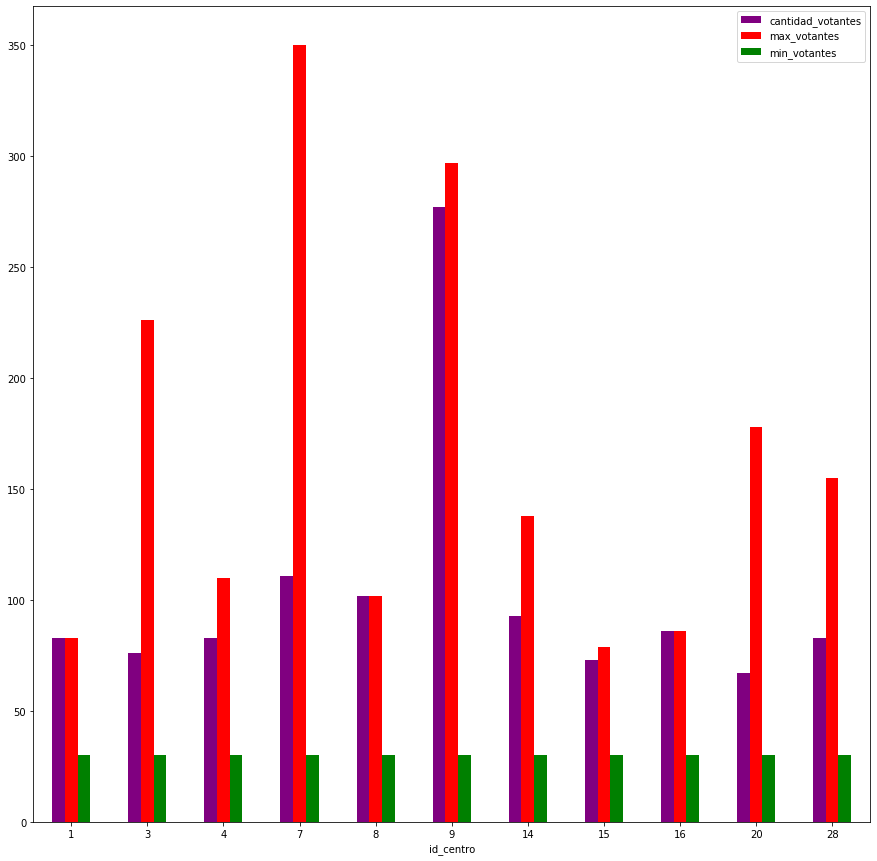

In [34]:
ax1 = cantidad_vs_max_por_centro.plot.bar(rot=0, figsize=(15,15), color = ['purple', 'red', 'green'])

plt.show()